In [2]:
import pandas as pd
import numpy as np
import altair as alt
import altair.vegalite.v2 as vl
##from altair.vegalite.v2 import api as alt
import matplotlib.pyplot as plt

cen_dem = pd.read_csv('C:/Users/abhis/git/sb_capstone/income/census/census-income.data',header=None)
cen_dem.columns = ['age',	'_class_of_worker',	'_industry_code',	'_occupation_code',	'_education',	'_wage_per_hour',
                   '_enrolled_in_edu_inst_last_wk',	'_marital_status',	'_major_industry_code',	'_major_occupation_code',
                   '_mace',	'_hispanic_Origin',	'_sex',	'_member_of_a_labor_union',	'_reason_for_unemployment',
                   '_full_or_part_time_employment_stat',	'_capital_gains',	'_capital_losses',	'_divdends_from_stocks',
                   '_tax_filer_status',	'_region_of_previous_residence',	'_state_of_previous_residence',
                   '_detailed_household_and_family_stat',	'_detailed_household_summary_in_household',	'_instance_weight',
                   '_migration_code-change_in_msa',	'_migration_code-change_in_reg',	'_migration_code-move_within_reg',
                   '_live_in_this_house_1_year_ago',	'_migration_prev_res_in_sunbelt',	'_num_persons_worked_for_employer',
                   '_family_members_under_18',	'_country_of_birth_father',	'_country_of_birth_mother',	'_country_of_birth_self',
                   '_citizenship',	'_own_business_or_self_employed',
                   'fill_inc_questionnaire',	'_veterans_benefits',	'_weeks_worked_in_year','year',	'Income_category'
]

cen_dem.info()

miss_col = ['_region_of_previous_residence',	'_migration_code-change_in_msa',	'_migration_code-change_in_reg',	
           '_migration_code-move_within_reg',	'_migration_prev_res_in_sunbelt',	'_country_of_birth_father',	
           '_country_of_birth_mother',	'_country_of_birth_self']
cont_col = ['age','_wage_per_hour','_capital_losses','_capital_gains',
             '_divdends_from_stocks','_num_persons_worked_for_employer']
special_col = ['Income_category','_instance_weight']

cat_col = [el for el in cen_dem.columns if el not in cont_col ]
cat_col = [el for el in cat_col if el not in special_col ]

print(cat_col)
print(cont_col)
print(special_col)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 42 columns):
age                                         199523 non-null int64
_class_of_worker                            199523 non-null object
_industry_code                              199523 non-null int64
_occupation_code                            199523 non-null int64
_education                                  199523 non-null object
_wage_per_hour                              199523 non-null int64
_enrolled_in_edu_inst_last_wk               199523 non-null object
_marital_status                             199523 non-null object
_major_industry_code                        199523 non-null object
_major_occupation_code                      199523 non-null object
_mace                                       199523 non-null object
_hispanic_Origin                            199523 non-null object
_sex                                        199523 non-null object
_member_of_a_labor_uni

In [ ]:
<b> <font size=16>Dataset URL</font></b>
http://archive.ics.uci.edu/ml/machine-learning-databases/census-income-mld/

<b>Q1. Do High earners tend to be older ?</b>

Indicatively high earners do tend to be older around ~ 45 years vs ~30 for low earners – This is driven by high volume of young professionals in the low earners. 
50% low earners are under 30 while only 5% high earners are under 30


len :  3156883  lenl :  216175
Low earners  [0.0 3.0 5.0 12.0 15.0 31.0 49.0 67.0 75.0]
High earners  [25.0 30.0 32.0 36.0 37.0 45.0 53.0 62.0 68.0]


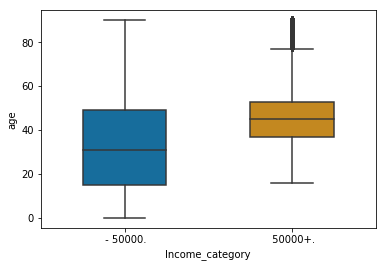

In [104]:
import seaborn as sns
import itertools

#Q. Do High earners tend to be older ?

# Income category by Age
df = cen_dem[['age','Income_category','_instance_weight']]

# repeating rows based on instance weight for a given row - divided by 100 to manage memory utilization. 
# That should not impact overall distribution

df1 = pd.DataFrame(df.values.repeat((df._instance_weight/100).astype(int),axis=0),columns=df.columns)

dl = df1[df1.Income_category == ' - 50000.']['age']
dh = df1[df1.Income_category == ' 50000+.']['age']

print('len : ',len(dl),' lenl : ',len(dh))

print("Low earners ",np.percentile(dl,[1,5,10,20,25,50,75,90,95]))

print("High earners ",np.percentile(dh,[1,5,10,20,25,50,75,90,95]))

df1['age'] = df1['age'].astype(int)
df1['Income_category'] = df1['Income_category'].astype(str)

sns.boxplot(y='age', x='Income_category', 
              data=df1, 
              width=0.5,
              palette="colorblind")
plt.show()
del df1


<b>Q2. Do higher earners tend to be employed by firms with more employees ?</b>
Boxplot below indicates that larger firms tend to pay their employees higher


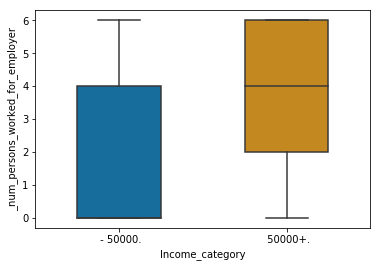

In [105]:
#Q. Do higher earners tend to be employed by firms with more employees ?

df = cen_dem[['_num_persons_worked_for_employer','Income_category','_instance_weight']]

df1 = pd.DataFrame(df.values.repeat((df._instance_weight/100).astype(int),axis=0),columns=df.columns)

df1['_num_persons_worked_for_employer'] = df1['_num_persons_worked_for_employer'].astype(int)
df1['Income_category'] = df1['Income_category'].astype(str)

sns.boxplot(y='_num_persons_worked_for_employer', x='Income_category', 
              data=df1, 
              width=0.5,
              palette="colorblind")
plt.show()
del df1

<b>Q3. Are there any visible trends based on father / mother country of origin - Do immigrants tend to earn higher or lower ?</b>
Population with immigrant parents tend to have higher earnings potential based on heatmap below – area marked within box
-	Some of the dark red cells tend to be driven by lower population in the cell (low denominator)
-	The data agrees with common beliefs around mating patterns – ex. First generation Asian-Indians dont seem to have non Indian partners, which makes sense in 1994-95 (Period of data), given conservative views. In a similar vein English/French/German nationals seem to have partners amongst each other.
-	There seems to be a relatively higher concentration of high earners within populations where both parents are non US, as depicted by the darker reds within the square
A heat map of Father / Mother birth country – color coded by % high earners (i.e. 5000+ population) in cell


Income_category                 - 50000.   50000+.
_country_of_birth_father                          
 ?                              0.914929  0.085071
 Cambodia                       0.975381  0.024619
 Canada                         0.897401  0.102599
 China                          0.902145  0.097855
 Columbia                       0.972024  0.027976
 Cuba                           0.949290  0.050710
 Dominican-Republic             0.986278  0.013722
 Ecuador                        0.971208  0.028792
 El-Salvador                    0.991982  0.008018
 England                        0.890887  0.109113
 France                         0.932121  0.067879
 Germany                        0.917866  0.082134
 Greece                         0.879965  0.120035
 Guatemala                      0.994783  0.005217
 Haiti                          0.977920  0.022080
 Holand-Netherlands             0.882279  0.117721
 Honduras                       0.999004  0.000996
 Hong Kong                     

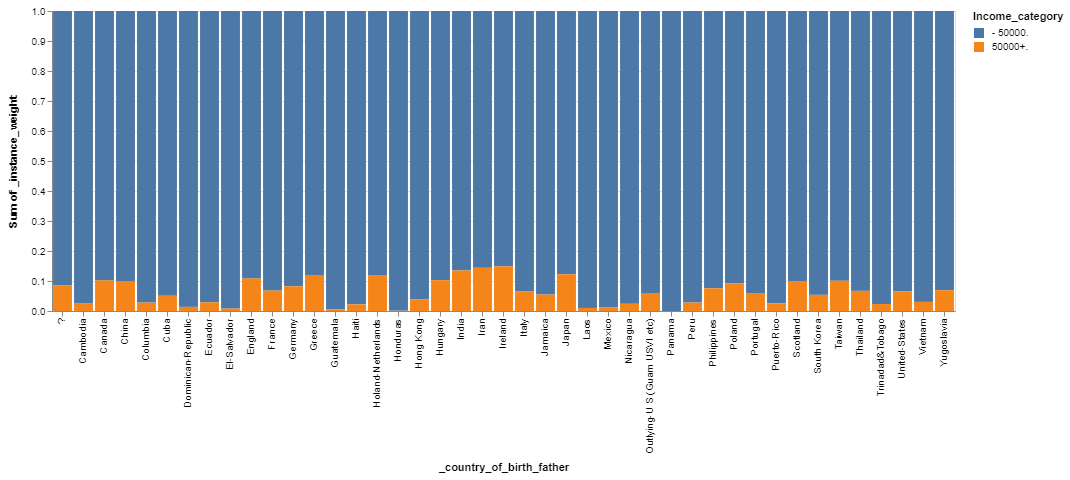

In [33]:
# Does country of Father / Mother;s Birth matter ?
# Are immigrant parent kids earning higher / lower than kids with american parents
piv_f = pd.crosstab(index=cen_dem._country_of_birth_father,columns=cen_dem.Income_category, 
                     values= cen_dem._instance_weight, aggfunc='sum',normalize='index')

print(piv_f)


cen_dem_bf = cen_dem[['Income_category','_instance_weight','_country_of_birth_father']]

import altair as alt
from altair import datasets, Chart
from vega_datasets import data
import pandas as pd


interval = alt.selection_interval(encodings=['x','y'])
alt.data_transformers.enable('json')
alt.Chart(cen_dem_bf).mark_bar().encode(
    x='_country_of_birth_father:N',
    y=alt.Y('sum(_instance_weight):Q',stack="normalize"),
    color=alt.condition(interval, 'Income_category', alt.value('lightgray'))
    ).properties(selection=interval)

Income_category                 - 50000.   50000+.
_country_of_birth_mother                          
 ?                              0.918739  0.081261
 Cambodia                       0.963368  0.036632
 Canada                         0.894655  0.105345
 China                          0.898813  0.101187
 Columbia                       0.979542  0.020458
 Cuba                           0.945851  0.054149
 Dominican-Republic             0.989618  0.010382
 Ecuador                        0.966374  0.033626
 El-Salvador                    0.978937  0.021063
 England                        0.887726  0.112274
 France                         0.903557  0.096443
 Germany                        0.913409  0.086591
 Greece                         0.913566  0.086434
 Guatemala                      0.991299  0.008701
 Haiti                          0.982840  0.017160
 Holand-Netherlands             0.856636  0.143364
 Honduras                       0.995953  0.004047
 Hong Kong                     

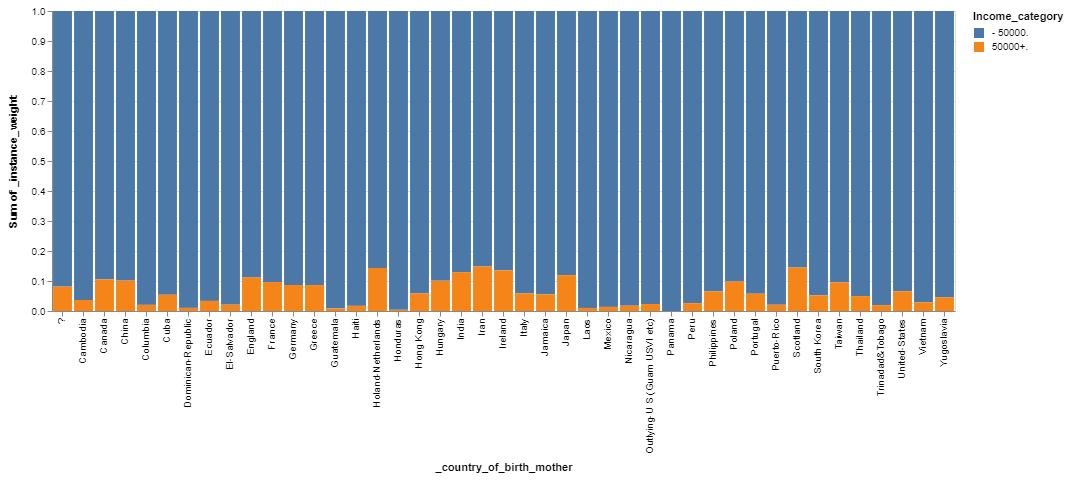

In [34]:
piv_m = pd.crosstab(index=cen_dem._country_of_birth_mother,columns=cen_dem.Income_category, 
                     values= cen_dem._instance_weight, aggfunc='sum',normalize='index')

print(piv_m)

cen_dem_bm = cen_dem[['Income_category','_instance_weight','_country_of_birth_mother']]

import altair as alt
from altair import datasets, Chart
from vega_datasets import data
import pandas as pd


interval = alt.selection_interval(encodings=['x','y'])
alt.data_transformers.enable('json')
alt.Chart(cen_dem_bm).mark_bar().encode(
    x='_country_of_birth_mother:N',
    y=alt.Y('sum(_instance_weight):Q',stack="normalize"),
    color=alt.condition(interval, 'Income_category', alt.value('lightgray'))
    ).properties(selection=interval)

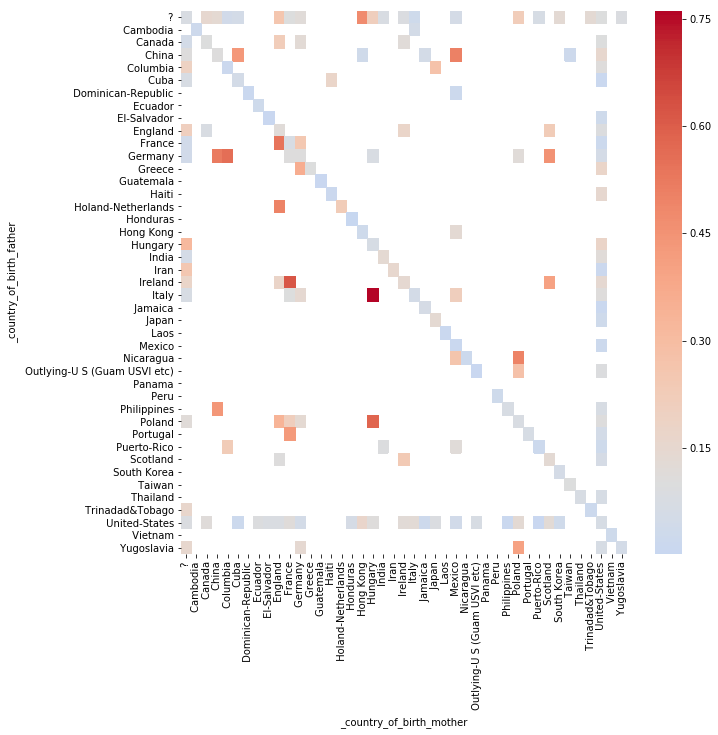

In [16]:
#Q Are there any visible trends based on father / mother country of origin - Do immigrants tend to earn higher or lower ?

import seaborn as sns

# assigning plot figure size
f,ax = plt.subplots(figsize=(10,10))

cen_dem_h = cen_dem[cen_dem.Income_category == ' 50000+.']
cen_dem_l = cen_dem[cen_dem.Income_category == ' - 50000.']

piv_h = pd.pivot_table(cen_dem_h,index='_country_of_birth_father',columns='_country_of_birth_mother', 
                     values= '_instance_weight', aggfunc='sum')
piv_l = pd.pivot_table(cen_dem_l,index='_country_of_birth_father',columns='_country_of_birth_mother', 
                     values= '_instance_weight', aggfunc='sum')
piv_ratio = piv_h / (piv_l+piv_h)

sns.heatmap(piv_ratio, fmt="g", center=0.1, cmap='coolwarm',ax=ax)
plt.show()

<b>Q4. Does marital status have any implications for earning</b>
‘Married-civilian spouse present’  category has a 11.9% high earner rate. There seems to be a casual relation between a stable marriage and earnings potential


_marital_status
 Divorced                            23177.46911
 Married-A F spouse present           1100.04532
 Married-civilian spouse present    144404.24141
 Married-spouse absent                2648.74206
 Never married                      151918.08099
 Separated                            6448.19212
 Widowed                             17549.12146
Name: _instance_weight, dtype: float64
Income_category                    - 50000.   50000+.
_marital_status                                      
 Never married                     0.986340  0.013660
 Married-A F spouse present        0.975048  0.024952
 Widowed                           0.968026  0.031974
 Separated                         0.949628  0.050372
 Married-spouse absent             0.944026  0.055974
 Divorced                          0.919324  0.080676
 Married-civilian spouse present   0.880651  0.119349
Index : Index([' Never married', ' Married-A F spouse present', ' Widowed',
       ' Separated', ' Married-spouse ab

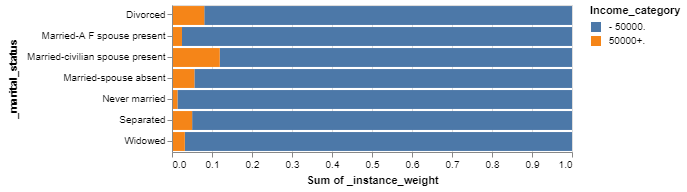

In [35]:
# does earning potential get impacted by marrital status /

print(cen_dem.groupby(by=['_marital_status'])['_instance_weight'].sum()/1000)

piv_m = pd.crosstab(index=cen_dem._marital_status,columns=cen_dem.Income_category, 
                     values= cen_dem._instance_weight, aggfunc='sum',normalize='index').sort_values([' 50000+.'])

print(piv_m)
print('Index :',piv_m.index,' columns ;',piv_m.columns)
cen_dem_m = cen_dem[['Income_category','_instance_weight','_marital_status']]

import altair as alt
from altair import datasets, Chart
from vega_datasets import data
import pandas as pd


interval = alt.selection_interval(encodings=['x','y'])
alt.data_transformers.enable('json')
alt.Chart(cen_dem_m).mark_bar().encode(
    y='_marital_status:N',
    x=alt.X('sum(_instance_weight):Q',stack="normalize"),
    color=alt.condition(interval, 'Income_category', alt.value('lightgray'))
    ).properties(selection=interval)


<b>Q5. Are men paid more tha women ?</b>

Based on the sample data it seem Men are paid dis-proportionately higher than women. This agrees with common
knowledge around the subject

Income_category   - 50000.   50000+.
_sex                                
 Female           0.973279  0.026721
 Male             0.896778  0.103222
Index : Index([' Female', ' Male'], dtype='object', name='_sex')  columns ; Index([' - 50000.', ' 50000+.'], dtype='object', name='Income_category')


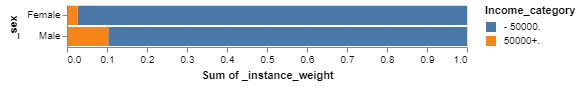

In [36]:

# Do men earn more than women ?

piv_s = pd.crosstab(index=cen_dem._sex,columns=cen_dem.Income_category, 
                     values= cen_dem._instance_weight, aggfunc='sum',normalize='index').sort_values([' 50000+.'])

print(piv_s)
print('Index :',piv_s.index,' columns ;',piv_s.columns)
cen_dem_s = cen_dem[['Income_category','_instance_weight','_sex']]

import altair as alt
from altair import datasets, Chart
from vega_datasets import data
import pandas as pd


interval = alt.selection_interval(encodings=['x','y'])
alt.data_transformers.enable('json')
alt.Chart(cen_dem_s).mark_bar().encode(
    y='_sex:N',
    x=alt.X('sum(_instance_weight):Q',stack="normalize"),
    color=alt.condition(interval, 'Income_category', alt.value('lightgray'))
    ).properties(selection=interval)


In [ ]:
<b>Q6. Do labor union members have higher earning potential in general ?</b>
Maybe a slight advantage. Need to analyze further.


Income_category            - 50000.   50000+.
_member_of_a_labor_union                     
 Not in universe           0.941893  0.058107
 No                        0.885462  0.114538
 Yes                       0.862266  0.137734
Index : Index([' Not in universe', ' No', ' Yes'], dtype='object', name='_member_of_a_labor_union')  columns ; Index([' - 50000.', ' 50000+.'], dtype='object', name='Income_category')


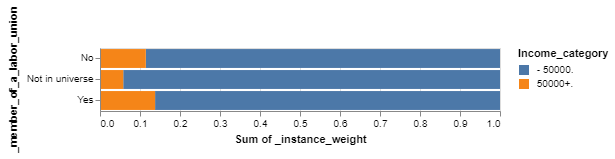

In [37]:

# Do labour union members have higher earning potential in general ??

piv_lu = pd.crosstab(index=cen_dem._member_of_a_labor_union,columns=cen_dem.Income_category, 
                     values= cen_dem._instance_weight, aggfunc='sum',normalize='index').sort_values([' 50000+.'])

print(piv_lu)
print('Index :',piv_lu.index,' columns ;',piv_s.columns)
cen_dem_lu = cen_dem[['Income_category','_instance_weight','_member_of_a_labor_union']]

import altair as alt
from altair import datasets, Chart
from vega_datasets import data
import pandas as pd


interval = alt.selection_interval(encodings=['x','y'])
alt.data_transformers.enable('json')
alt.Chart(cen_dem_lu).mark_bar().encode(
    y='_member_of_a_labor_union:N',
    x=alt.X('sum(_instance_weight):Q',stack="normalize"),
    color=alt.condition(interval, 'Income_category', alt.value('lightgray'))
    ).properties(selection=interval)




In [ ]:
<b>Q7. How much does education impact earnings potential ?</b>
Earnings potential increases as educational qualification increases, which agrees with prevailing understanding and justifies high cost of higher education to some extent


Income_category                           - 50000.   50000+.
_education                                                  
 Children                                 1.000000  0.000000
 Less than 1st grade                      0.999160  0.000840
 9th grade                                0.994039  0.005961
 1st 2nd 3rd or 4th grade                 0.993590  0.006410
 5th or 6th grade                         0.993539  0.006461
 10th grade                               0.991658  0.008342
 7th and 8th grade                        0.991161  0.008839
 11th grade                               0.989689  0.010311
 12th grade no diploma                    0.985186  0.014814
 High school graduate                     0.962378  0.037622
 Some college but no degree               0.935043  0.064957
 Associates degree-occup /vocational      0.924064  0.075936
 Associates degree-academic program       0.903676  0.096324
 Bachelors degree(BA AB BS)               0.796526  0.203474
 Masters degree(MA MS ME

C:\Users\abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


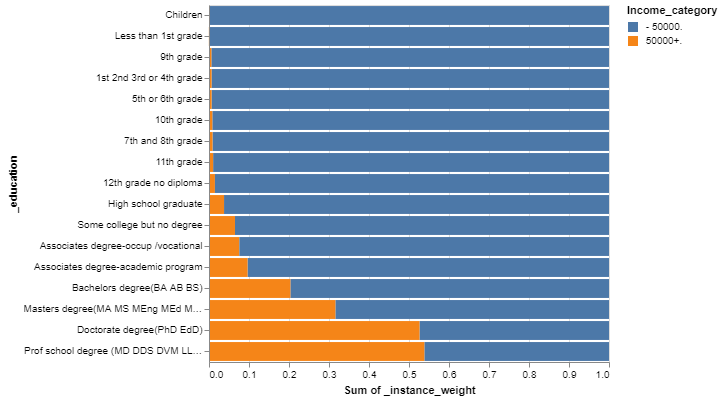

In [32]:
# how much does education impact earnings potential ?

piv_e = pd.crosstab(index=cen_dem._education,columns=cen_dem.Income_category, 
                     values= cen_dem._instance_weight, aggfunc='sum',normalize='index').sort_values([' 50000+.'])

print(piv_e)
#print('Index :',piv_e.index,' columns ;',piv_e.columns)
cen_dem_e = cen_dem[['Income_category','_instance_weight','_education']]

cen_dem_e['_education'] = cen_dem_e['_education'].str.strip()

import altair as alt
from altair import datasets, Chart
from vega_datasets import data
import pandas as pd


interval = alt.selection_interval(encodings=['x','y'])
alt.data_transformers.enable('json')
alt.Chart(cen_dem_e).mark_bar().encode(
    y=alt.Y('_education:N', sort=['Children',	'Less than 1st grade',	'9th grade',	'1st 2nd 3rd or 4th grade',	'5th or 6th grade',
'10th grade',	'7th and 8th grade',	'11th grade',	'12th grade no diploma',	'High school graduate',	
'Some college but no degree',	'Associates degree-occup /vocational',	'Associates degree-academic program',	
'Bachelors degree(BA AB BS)',	'Masters degree(MA MS MEng MEd MSW MBA)',	'Doctorate degree(PhD EdD)',	
'Prof school degree (MD DDS DVM LLB JD)']),
    x=alt.X('sum(_instance_weight):Q',stack="normalize"),
    color=alt.condition(interval, 'Income_category', alt.value('lightgray'))
).properties(selection=interval)

